In [14]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

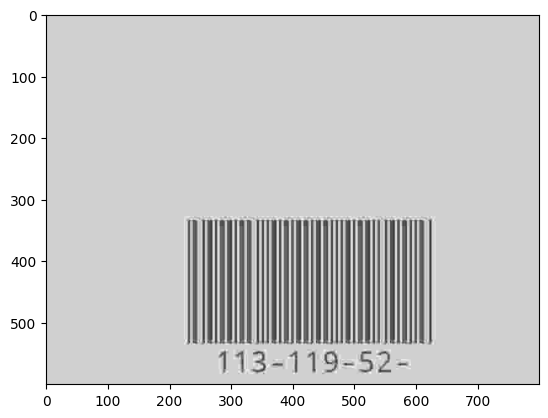

In [17]:
# Load the uploaded image
input_path = "testcases/08 - compresso espresso.jpg"
image = Image.open(input_path)
plt.imshow(image)

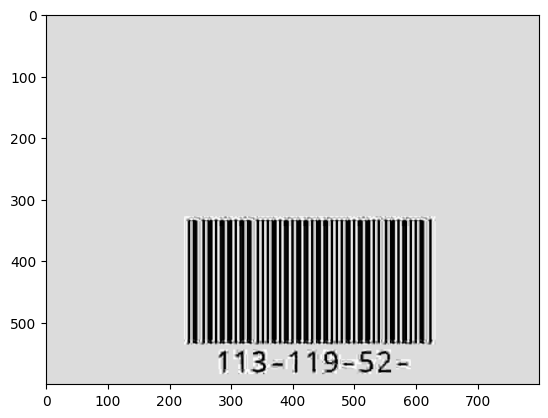

In [19]:
# Step 1: Enhance contrast
enhancer = ImageEnhance.Contrast(image)
enhanced_image = enhancer.enhance(2)  # Increase contrast

plt.imshow(enhanced_image)

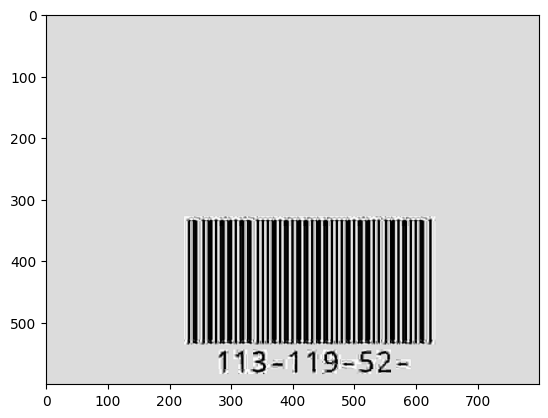

In [20]:
# Step 2: Sharpen the image
sharp_enhancer = ImageEnhance.Sharpness(enhanced_image)
sharpened_image = sharp_enhancer.enhance(2)  # Increase sharpness

plt.imshow(sharpened_image)

In [21]:
# Step 3: Resize (scale up) to improve readability
scaled_image = sharpened_image.resize((sharpened_image.width * 2, sharpened_image.height * 2))


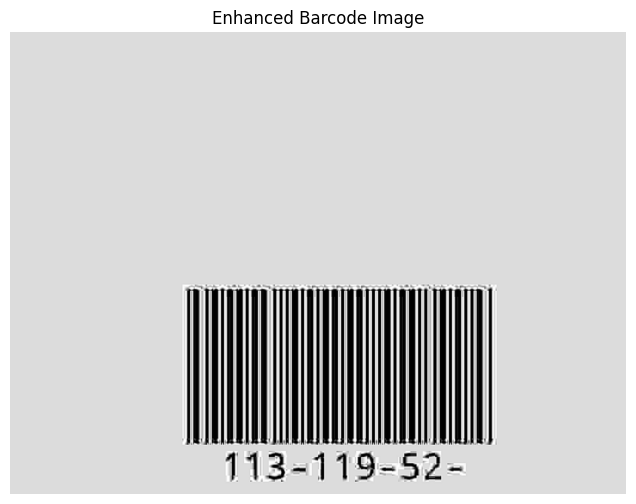

In [22]:
# Display the processed image
plt.figure(figsize=(10, 6))
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')
plt.title("Enhanced Barcode Image")
plt.show()

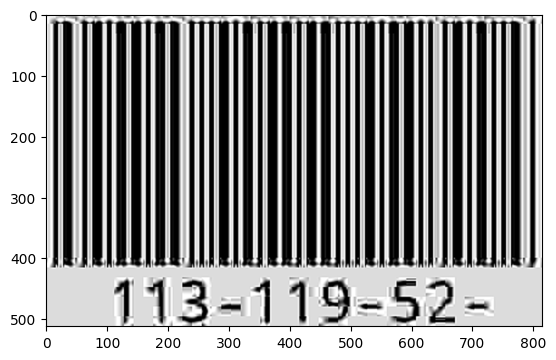

In [23]:
threshold = 200

# Open the image and convert it to grayscale
image = scaled_image.convert("L")
np_image = np.array(image)

# Identify rows and columns with significant pixel values
rows = np.any(np_image < threshold, axis=1)
cols = np.any(np_image < threshold, axis=0)

# Get the bounding box
row_indices = np.where(rows)[0]
col_indices = np.where(cols)[0]
top, bottom = row_indices[0], row_indices[-1]
left, right = col_indices[0], col_indices[-1]

# Crop the image
cropped_image = image.crop((left, top, right, bottom))

plt.imshow(cropped_image, cmap='gray')

In [ ]:
# # Save the processed image for further use
# output_path = "/mnt/data/enhanced_barcode_image.jpg"
# scaled_image.save(output_path)
# 
# output_path